#pip

In [ ]:
!pip install "dask[dataframe]"


INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 5.6 MB/s eta 0:00:00


#data

In [28]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, precision_recall_curve, auc, confusion_matrix, roc_curve
from joblib import dump, load
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import AllKNN
from collections import Counter
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import joblib

In [29]:
data = joblib.load('/content/drive/MyDrive/Bankruptcy Prediction Data/Prepared Dataset/Dataset.pkl')

X = data.drop(columns=['result'])
y = data['result']

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

# Step 2: Normalize the Training and Test Data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


In [30]:
# Step 3: Apply All KNN Undersampling to Reduce Majority Class
all_knn = AllKNN(n_neighbors=3, kind_sel='all')  # Adjust n_neighbors if needed
X_train_resampled, y_train_resampled = all_knn.fit_resample(X_train_normalized, y_train)

# Print Resampling Statistics
print(f"Original dataset shape: {Counter(y_train)}")
print(f"Resampled dataset shape: {Counter(y_train_resampled)}")

Original dataset shape: Counter({0: 113779, 1: 14180})
Resampled dataset shape: Counter({0: 100163, 1: 14180})


#mod

In [31]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1, subsample=0.8),
    }


In [32]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [33]:
cv_results = {model_name: [] for model_name in models.keys()}
roc_curves_cv = {model_name: [] for model_name in models.keys()}
pr_curves_cv = {model_name: [] for model_name in models.keys()}


Training Random Forest with Cross-Validation
Mean Threshold for Random Forest: 0.39

Cross-validation Metrics for Random Forest:
  Fold 1: Accuracy: 0.9569, Precision: 0.8496, Recall: 0.7930, F1: 0.8204
  Fold 2: Accuracy: 0.9615, Precision: 0.8862, Recall: 0.7909, F1: 0.8358
  Fold 3: Accuracy: 0.9584, Precision: 0.8459, Recall: 0.8128, F1: 0.8290
  Fold 4: Accuracy: 0.9569, Precision: 0.8414, Recall: 0.8043, F1: 0.8224
  Fold 5: Accuracy: 0.9601, Precision: 0.8661, Recall: 0.8025, F1: 0.8331


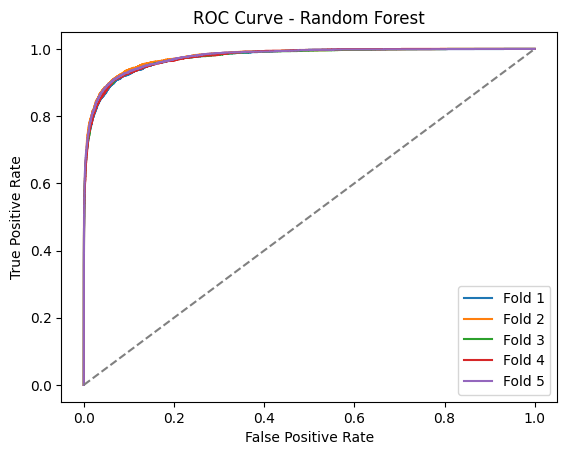

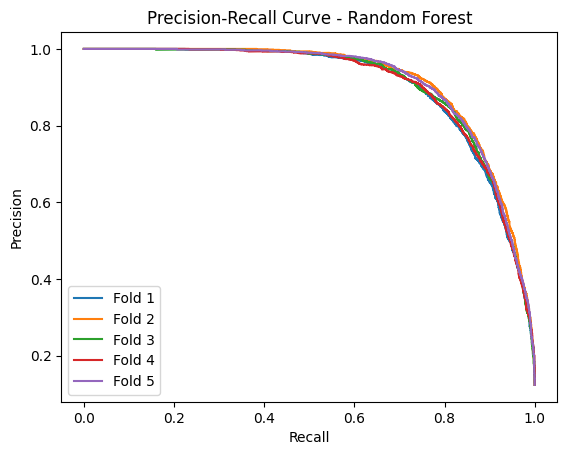


Training XGBoost with Cross-Validation
Mean Threshold for XGBoost: 0.42

Cross-validation Metrics for XGBoost:
  Fold 1: Accuracy: 0.9583, Precision: 0.8481, Recall: 0.8089, F1: 0.8280
  Fold 2: Accuracy: 0.9606, Precision: 0.8708, Recall: 0.8011, F1: 0.8345
  Fold 3: Accuracy: 0.9590, Precision: 0.8517, Recall: 0.8103, F1: 0.8305
  Fold 4: Accuracy: 0.9578, Precision: 0.8774, Recall: 0.7669, F1: 0.8184
  Fold 5: Accuracy: 0.9595, Precision: 0.8529, Recall: 0.8138, F1: 0.8329


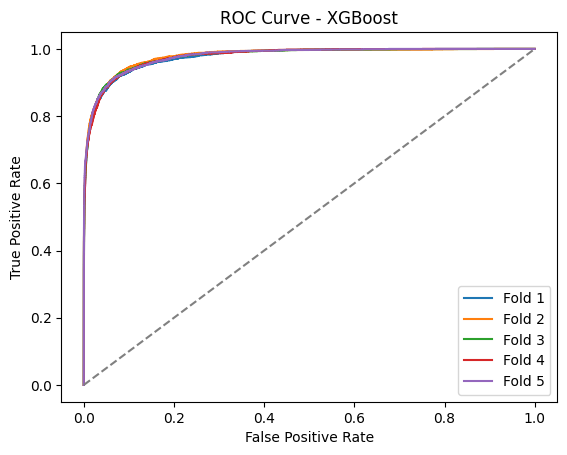

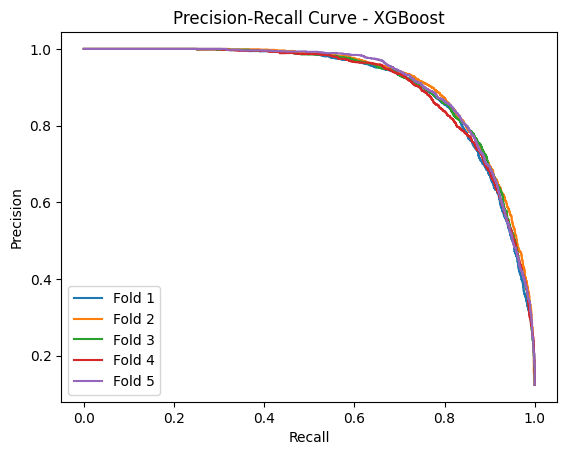


Final Training for Random Forest

Final Metrics for Random Forest: {'Accuracy': 0.9268755861206627, 'Precision': 0.6365128785734503, 'Recall': 0.792947813822285, 'F1': 0.7061705134243994, 'ROC AUC': 0.9558660051156551, 'PR AUC': 0.7772483658600844}


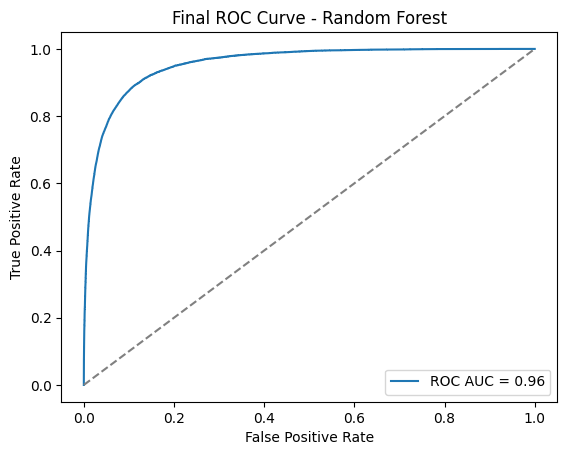

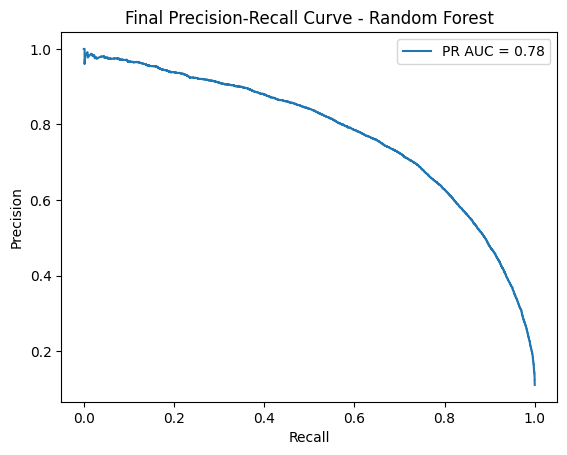


Final Training for XGBoost

Final Metrics for XGBoost: {'Accuracy': 0.9262503907471085, 'Precision': 0.6308702610231224, 'Recall': 0.8062059238363892, 'F1': 0.7078418624810378, 'ROC AUC': 0.9596702597817628, 'PR AUC': 0.7894755615395821}


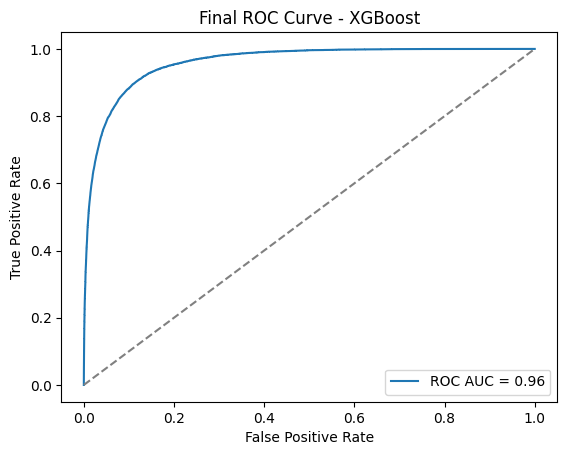

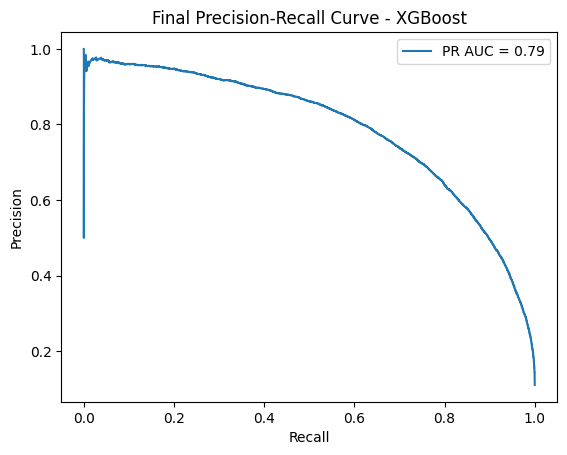

In [ ]:

# Models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1, subsample=0.8),
}

# Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
cv_results = {model_name: [] for model_name in models.keys()}
roc_curves_cv = {model_name: [] for model_name in models.keys()}
pr_curves_cv = {model_name: [] for model_name in models.keys()}

for model_name, model in models.items():
    print(f"\nTraining {model_name} with Cross-Validation")
    thresholds = []

    for fold_idx, (train_index, val_index) in enumerate(cv.split(X_train_resampled, y_train_resampled)):
        X_fold_train, X_fold_val = X_train_resampled[train_index], X_train_resampled[val_index]
        y_fold_train, y_fold_val = y_train_resampled[train_index], y_train_resampled[val_index]

        model.fit(X_fold_train, y_fold_train)
        y_fold_proba = model.predict_proba(X_fold_val)[:, 1]

        # Find the best threshold for F1
        best_threshold = 0.5
        best_f1 = 0
        for threshold in np.arange(0.1, 1.0, 0.01):
            y_fold_pred = (y_fold_proba >= threshold).astype(int)
            f1 = f1_score(y_fold_val, y_fold_pred)
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold

        thresholds.append(best_threshold)

        # Metrics at best threshold
        y_fold_pred = (y_fold_proba >= best_threshold).astype(int)
        accuracy = accuracy_score(y_fold_val, y_fold_pred)
        precision = precision_score(y_fold_val, y_fold_pred)
        recall = recall_score(y_fold_val, y_fold_pred)
        f1 = f1_score(y_fold_val, y_fold_pred)
        roc_auc = roc_auc_score(y_fold_val, y_fold_proba)

        conf_matrix = confusion_matrix(y_fold_val, y_fold_pred)
        pr_curve_precision, pr_curve_recall, _ = precision_recall_curve(y_fold_val, y_fold_proba)
        pr_auc = auc(pr_curve_recall, pr_curve_precision)

        cv_results[model_name].append({
            "Fold": fold_idx + 1,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1": f1,
            "ROC AUC": roc_auc,
            "PR AUC": pr_auc,
        })

        # ROC and PR curves
        fpr, tpr, _ = roc_curve(y_fold_val, y_fold_proba)
        roc_curves_cv[model_name].append((fpr, tpr))
        pr_curves_cv[model_name].append((pr_curve_precision, pr_curve_recall))

    mean_threshold = np.mean(thresholds)
    print(f"Mean Threshold for {model_name}: {mean_threshold:.2f}")

    # Display Cross-validation Metrics
    print(f"\nCross-validation Metrics for {model_name}:")
    for fold_metrics in cv_results[model_name]:
        print(f"  Fold {fold_metrics['Fold']}: Accuracy: {fold_metrics['Accuracy']:.4f}, Precision: {fold_metrics['Precision']:.4f}, Recall: {fold_metrics['Recall']:.4f}, F1: {fold_metrics['F1']:.4f}")

    # Plot ROC and PR curves
    plt.figure()
    for fold_idx, (fpr, tpr) in enumerate(roc_curves_cv[model_name]):
        plt.plot(fpr, tpr, label=f"Fold {fold_idx + 1}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    plt.figure()
    for fold_idx, (precision, recall) in enumerate(pr_curves_cv[model_name]):
        plt.plot(recall, precision, label=f"Fold {fold_idx + 1}")
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()

# Final Training and Evaluation
final_results = {}

for model_name, model in models.items():
    print(f"\nFinal Training for {model_name}")
    model.fit(X_train_resampled, y_train_resampled)
    y_test_proba = model.predict_proba(X_test_normalized)[:, 1]

    # Use the mean threshold from CV
    mean_threshold = np.mean(thresholds)
    y_test_pred = (y_test_proba >= mean_threshold).astype(int)

    # Metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_proba)

    conf_matrix = confusion_matrix(y_test, y_test_pred)
    pr_curve_precision, pr_curve_recall, _ = precision_recall_curve(y_test, y_test_proba)
    pr_auc = auc(pr_curve_recall, pr_curve_precision)

    final_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc,
    }

    print(f"\nFinal Metrics for {model_name}: {final_results[model_name]}")

    # Plot final curves
    plt.figure()
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.title(f"Final ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(pr_curve_recall, pr_curve_precision, label=f"PR AUC = {pr_auc:.2f}")
    plt.title(f"Final Precision-Recall Curve - {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()


#NN

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
import tensorflow as tf

def f1_score_metric(y_true, y_pred):
    # Convert both y_true and y_pred to float32
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.round(y_pred)  # Convert probabilities to binary predictions (0 or 1)
    y_pred = tf.cast(y_pred, tf.float32)

    # Compute true positives, false positives, and false negatives
    tp = tf.reduce_sum(y_true * y_pred)
    fp = tf.reduce_sum((1 - y_true) * y_pred)
    fn = tf.reduce_sum(y_true * (1 - y_pred))

    # Precision and recall
    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())

    # F1 score
    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return f1


In [ ]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def create_nn(units_1, dropout_1, n_layers, units_2, dropout_2, learning_rate, input_dim):
    model = Sequential()

    # Explicit Input layer
    model.add(Input(shape=(input_dim,)))

    # First dense layer
    model.add(Dense(units_1, activation='relu'))
    model.add(Dropout(dropout_1))

    # Additional layers based on n_layers
    for _ in range(n_layers - 1):
        model.add(Dense(units_2, activation='relu'))
        model.add(Dropout(dropout_2))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=[f1_score_metric])
    return model


In [ ]:
#hyperparameters based on Optuna results
best_hyperparameters = {
    'units_1': 128,
    'dropout_1': 0.2,
    'n_layers': 1,
    'units_2': 96,
    'dropout_2': 0.5,
    'learning_rate': 0.0006448191978189127
}


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


Training Neural Network: Fold 1
715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Training Neural Network: Fold 2
715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Training Neural Network: Fold 3
715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Training Neural Network: Fold 4
715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Training Neural Network: Fold 5
715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean Threshold for Neural Network: 0.40

Cross-validation Metrics for Neural Network:
  Fold 1:
    Accuracy: 0.9608
    Precision: 0.8489
    Recall: 0.8322
    F1: 0.8405
    ROC AUC: 0.9765
    PR AUC: 0.9137
  Fold 2:
    Accuracy: 0.9626
    Precision: 0.8794
    Recall: 0.8096
    F1: 0.8430
    ROC AUC: 0.9784
    PR AUC: 0.9194
  Fold 3:
    Accuracy: 0.9607
    Precision: 0.8651
    Recall: 0.8092
    F1: 0.8362
    ROC AUC: 0.9767
    PR AUC: 0.9113
  Fold 4:
    Accuracy: 0.9604
    Precision: 0.8644
    Recall: 0.8071
    F1: 0.8348
    ROC AUC: 0.9770
    PR AUC: 0.9112
  Fold 5:
    Accuracy: 0.9615
    Precision:

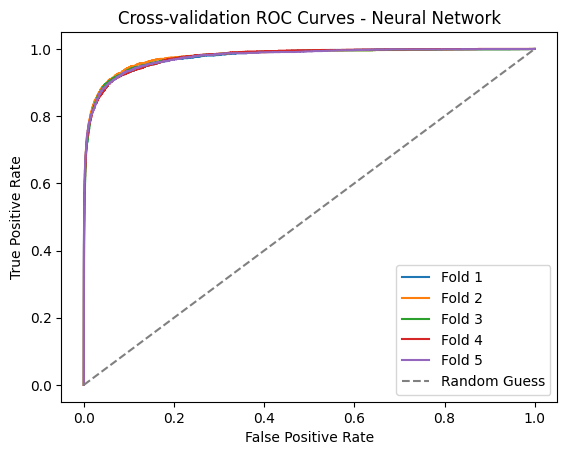

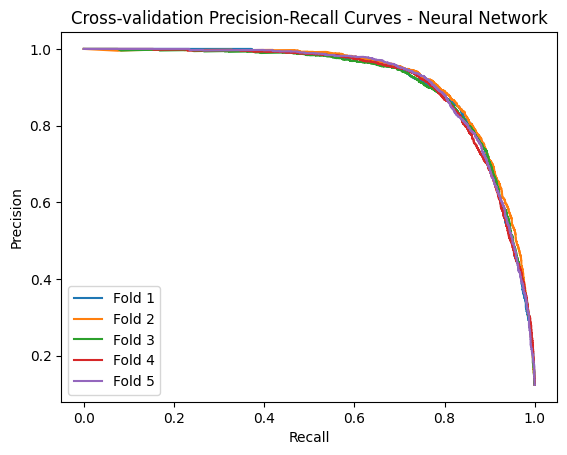


Final Training for Neural Network
Epoch 1/20
894/894 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - f1_score_metric: 0.6693 - loss: 0.2263
Epoch 2/20
117/894 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score_metric: 0.7803 - loss: 0.1360

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: f1_score_metric,loss
  current = self.get_monitor_value(logs)


894/894 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score_metric: 0.7826 - loss: 0.1380
Epoch 3/20
894/894 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score_metric: 0.7969 - loss: 0.1324
Epoch 4/20
894/894 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score_metric: 0.8058 - loss: 0.1267
Epoch 5/20
894/894 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score_metric: 0.8048 - loss: 0.1236
Epoch 6/20
894/894 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score_metric: 0.8032 - loss: 0.1233
Epoch 7/20
894/894 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score_metric: 0.8153 - loss: 0.1176
Epoch 8/20
894/894 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score_metric: 0.8117 - loss: 0.1169
Epoch 9/20
894/894 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score_metric: 0.8127 - loss: 0.1184
Epoch 10/20
894/894 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score_metric: 0.8167 - loss: 0.1132
Epoch 11/20
894/894 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score_metric: 0.8206 - loss: 0.1130
Epoch 12/20
894/894 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score_metric: 0.8178 

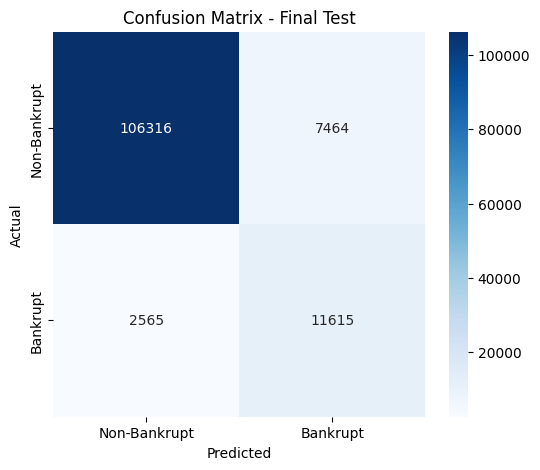

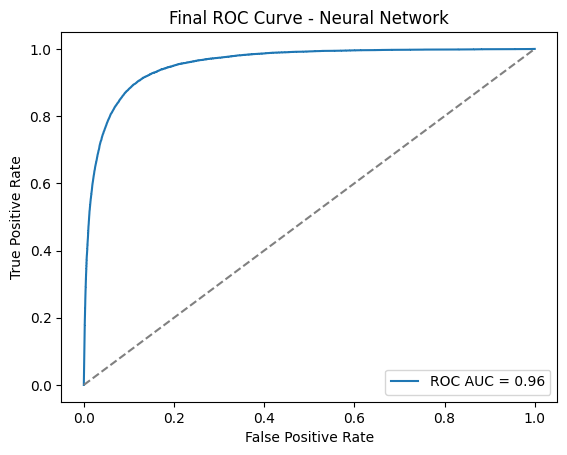

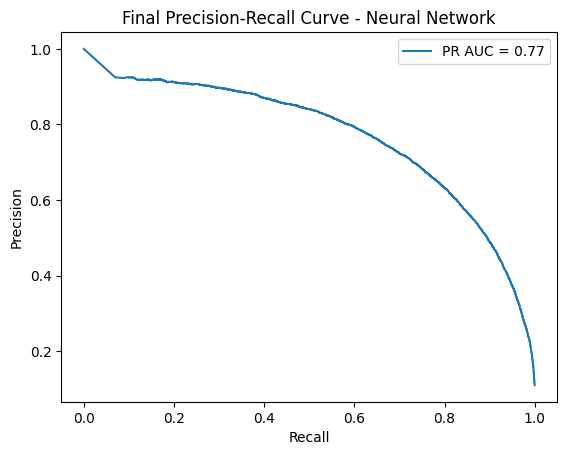

In [ ]:
# Initialize results storage
cv_results = {'Neural Network': []}
roc_curves_cv = {'Neural Network': []}
pr_curves_cv = {'Neural Network': []}

thresholds = []
input_dim = X_train_resampled.shape[1]  # Use resampled dataset dimensions

# Cross-validation
for fold_idx, (train_index, val_index) in enumerate(cv.split(X_train_resampled, y_train_resampled)):
    print(f"Training Neural Network: Fold {fold_idx + 1}")

    X_fold_train, X_fold_val = X_train_resampled[train_index], X_train_resampled[val_index]
    y_fold_train, y_fold_val = y_train_resampled[train_index], y_train_resampled[val_index]

    # Create and train the model
    nn_model = create_nn(**best_hyperparameters, input_dim=input_dim)
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    nn_model.fit(X_fold_train, y_fold_train, validation_data=(X_fold_val, y_fold_val),
                 epochs=20, batch_size=128, verbose=0, callbacks=[early_stopping])

    # Predict probabilities
    y_fold_proba = nn_model.predict(X_fold_val).flatten()

    # Find best threshold for F1
    best_threshold = 0.5
    best_f1 = 0
    for threshold in np.arange(0.1, 1.0, 0.01):
        y_fold_pred = (y_fold_proba >= threshold).astype(int)
        f1 = f1_score(y_fold_val, y_fold_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    thresholds.append(best_threshold)

    # Evaluate at best threshold
    y_fold_pred = (y_fold_proba >= best_threshold).astype(int)
    accuracy = accuracy_score(y_fold_val, y_fold_pred)
    precision = precision_score(y_fold_val, y_fold_pred)
    recall = recall_score(y_fold_val, y_fold_pred)
    f1 = f1_score(y_fold_val, y_fold_pred)
    roc_auc = roc_auc_score(y_fold_val, y_fold_proba)

    conf_matrix = confusion_matrix(y_fold_val, y_fold_pred)
    pr_curve_precision, pr_curve_recall, _ = precision_recall_curve(y_fold_val, y_fold_proba)
    pr_auc = auc(pr_curve_recall, pr_curve_precision)

    # Save metrics
    cv_results['Neural Network'].append({
        "Fold": fold_idx + 1,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc,
    })

    # Save ROC and PR curves
    fpr, tpr, _ = roc_curve(y_fold_val, y_fold_proba)
    roc_curves_cv['Neural Network'].append((fpr, tpr))
    pr_curves_cv['Neural Network'].append((pr_curve_precision, pr_curve_recall))

# Compute mean threshold
mean_threshold = np.mean(thresholds)
print(f"Mean Threshold for Neural Network: {mean_threshold:.2f}")

# Display Cross-validation Metrics
print(f"\nCross-validation Metrics for Neural Network:")
for fold_metrics in cv_results['Neural Network']:
    print(f"  Fold {fold_metrics['Fold']}:")
    for metric, value in fold_metrics.items():
        if metric != "Fold":
            print(f"    {metric}: {value:.4f}")

# Plot cross-validation ROC curves
plt.figure()
for fold_idx, (fpr, tpr) in enumerate(roc_curves_cv['Neural Network']):
    plt.plot(fpr, tpr, label=f"Fold {fold_idx + 1}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.title("Cross-validation ROC Curves - Neural Network")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Plot cross-validation PR curves
plt.figure()
for fold_idx, (precision, recall) in enumerate(pr_curves_cv['Neural Network']):
    plt.plot(recall, precision, label=f"Fold {fold_idx + 1}")
plt.title("Cross-validation Precision-Recall Curves - Neural Network")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

# Final Model Training and Evaluation
print("\nFinal Training for Neural Network")
final_nn_model = create_nn(**best_hyperparameters, input_dim=input_dim)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
final_nn_model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=128, verbose=1, callbacks=[early_stopping])

# Test Set Predictions
y_test_proba = final_nn_model.predict(X_test_normalized).flatten()
y_test_pred = (y_test_proba >= mean_threshold).astype(int)

# Test Metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_proba)

conf_matrix = confusion_matrix(y_test, y_test_pred)
pr_curve_precision, pr_curve_recall, _ = precision_recall_curve(y_test, y_test_proba)
pr_auc = auc(pr_curve_recall, pr_curve_precision)

# Save results
final_results = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1": f1,
    "ROC AUC": roc_auc,
    "PR AUC": pr_auc
}

# Display final metrics
print("\nFinal Test Metrics:")
for metric, value in final_results.items():
    print(f"  {metric}: {value:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Bankrupt', 'Bankrupt'],
            yticklabels=['Non-Bankrupt', 'Bankrupt'])
plt.title("Confusion Matrix - Final Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot final ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("Final ROC Curve - Neural Network")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Plot final PR curve
plt.figure()
plt.plot(pr_curve_recall, pr_curve_precision, label=f"PR AUC = {pr_auc:.2f}")
plt.title("Final Precision-Recall Curve - Neural Network")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


#models


Training Random Forest with Cross-Validation


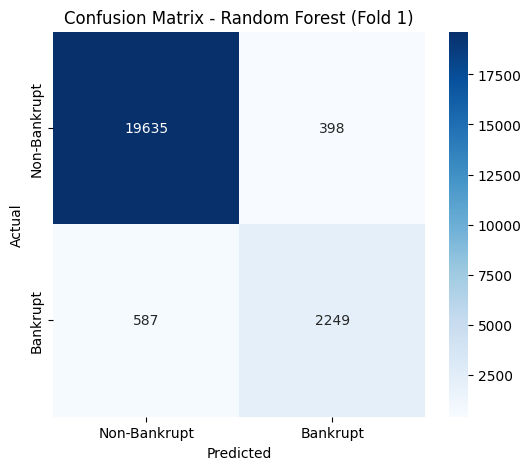

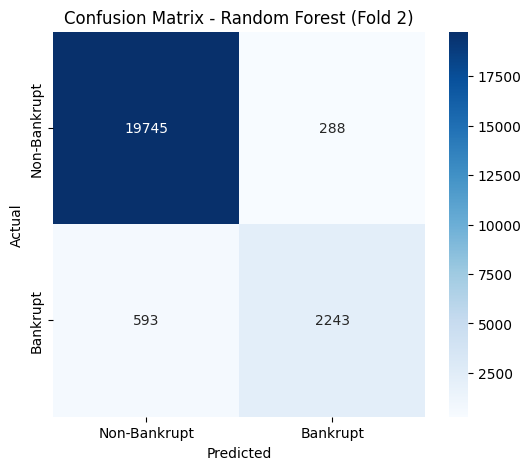

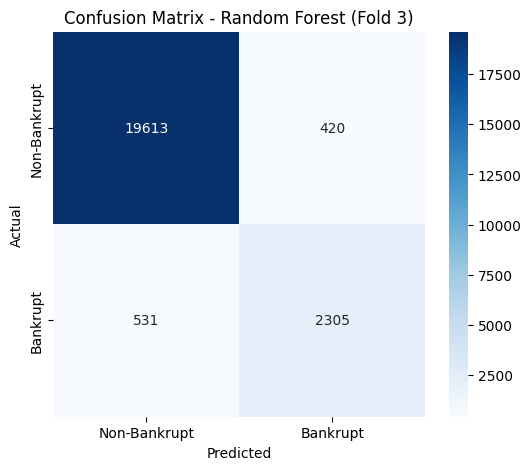

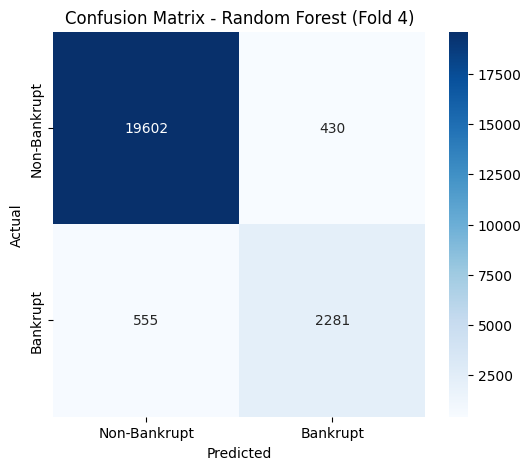

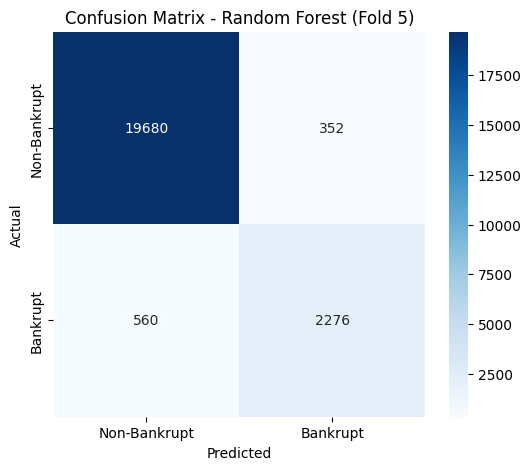

Mean Threshold for Random Forest: 0.39

Cross-validation Metrics for Random Forest:
  Fold 1: Accuracy: 0.9569, Precision: 0.8496, Recall: 0.7930, F1: 0.8204
  Fold 2: Accuracy: 0.9615, Precision: 0.8862, Recall: 0.7909, F1: 0.8358
  Fold 3: Accuracy: 0.9584, Precision: 0.8459, Recall: 0.8128, F1: 0.8290
  Fold 4: Accuracy: 0.9569, Precision: 0.8414, Recall: 0.8043, F1: 0.8224
  Fold 5: Accuracy: 0.9601, Precision: 0.8661, Recall: 0.8025, F1: 0.8331


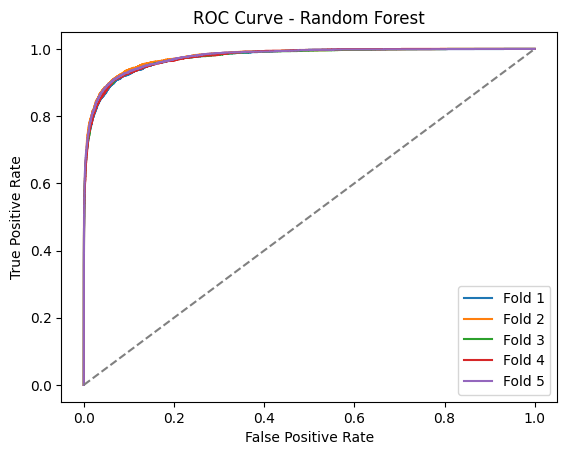

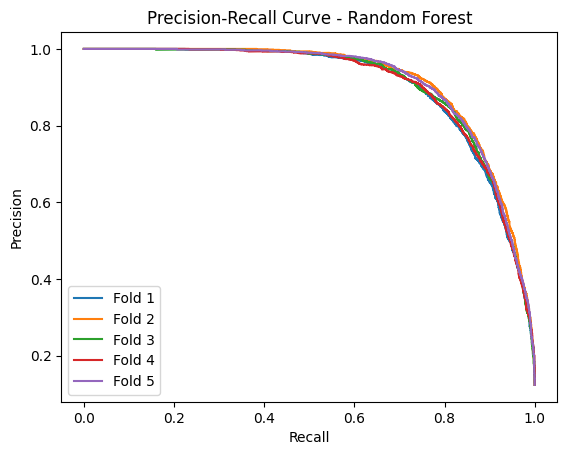


Training XGBoost with Cross-Validation


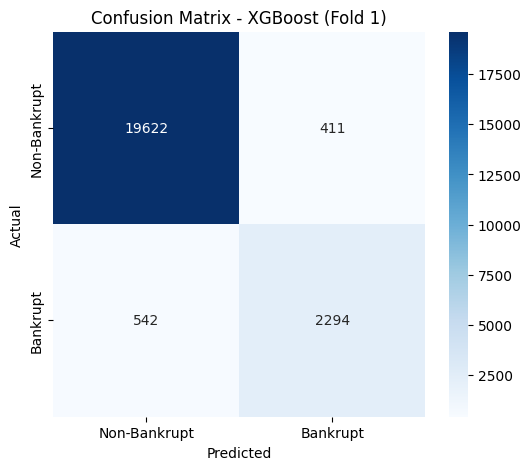

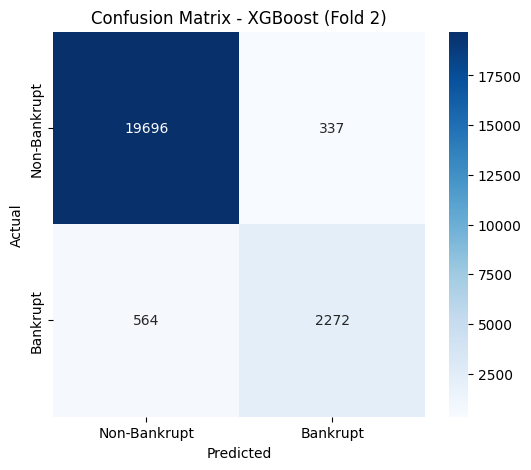

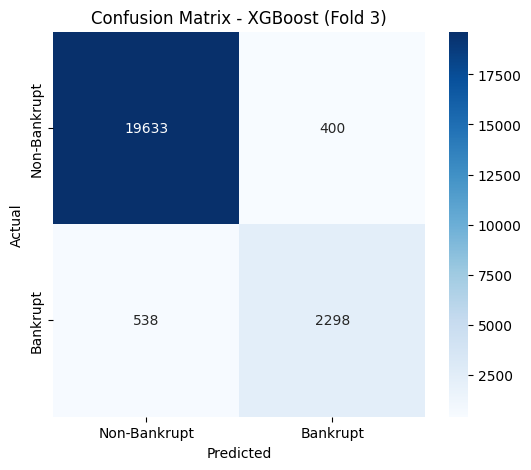

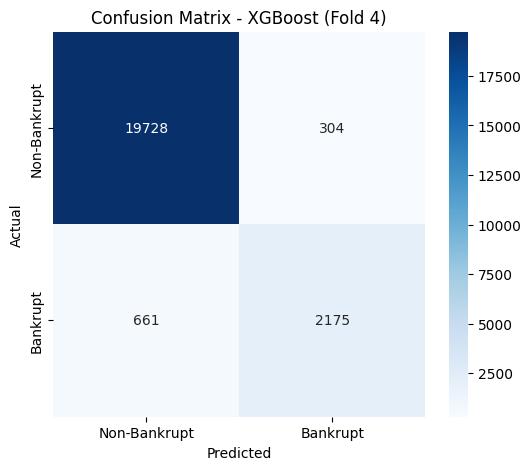

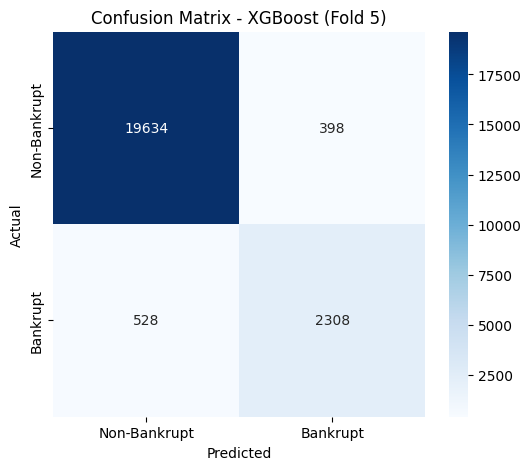

Mean Threshold for XGBoost: 0.42

Cross-validation Metrics for XGBoost:
  Fold 1: Accuracy: 0.9583, Precision: 0.8481, Recall: 0.8089, F1: 0.8280
  Fold 2: Accuracy: 0.9606, Precision: 0.8708, Recall: 0.8011, F1: 0.8345
  Fold 3: Accuracy: 0.9590, Precision: 0.8517, Recall: 0.8103, F1: 0.8305
  Fold 4: Accuracy: 0.9578, Precision: 0.8774, Recall: 0.7669, F1: 0.8184
  Fold 5: Accuracy: 0.9595, Precision: 0.8529, Recall: 0.8138, F1: 0.8329


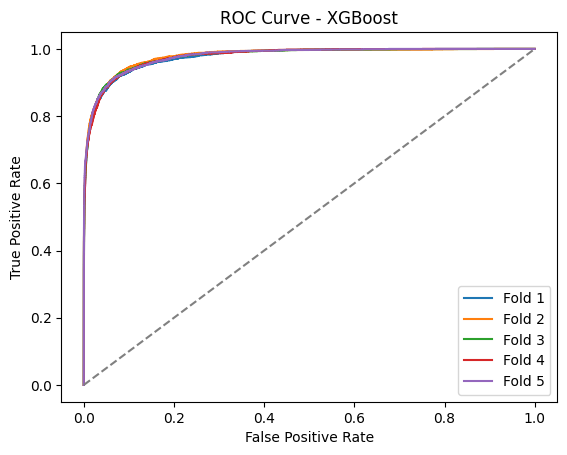

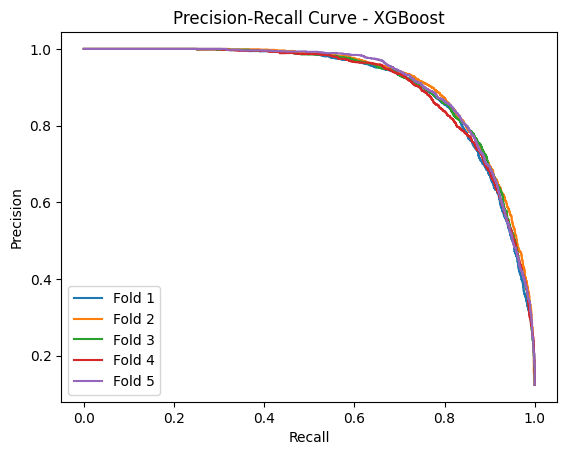


Final Training for Random Forest

Final Metrics for Random Forest: {'Accuracy': 0.9268755861206627, 'Precision': 0.6365128785734503, 'Recall': 0.792947813822285, 'F1': 0.7061705134243994, 'ROC AUC': 0.9558660051156551, 'PR AUC': 0.7772483658600844}


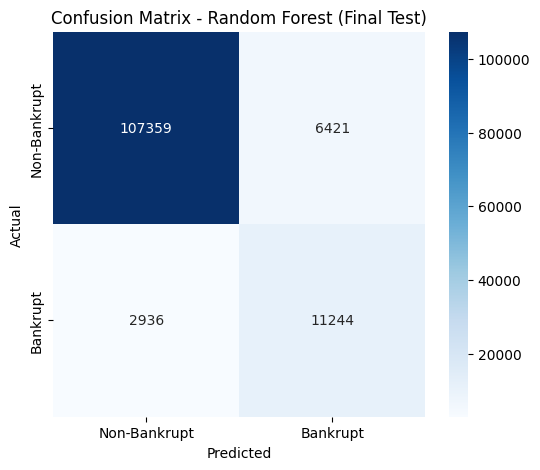

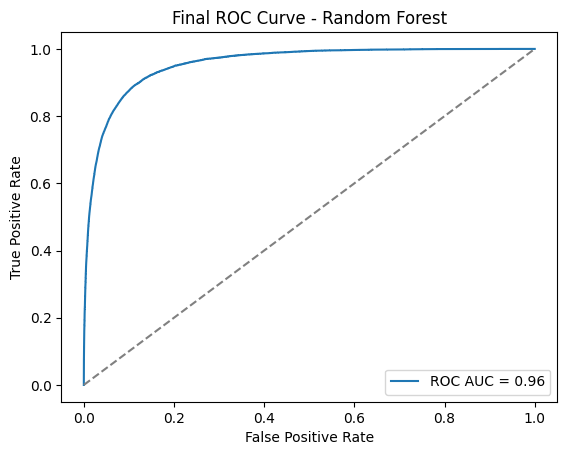

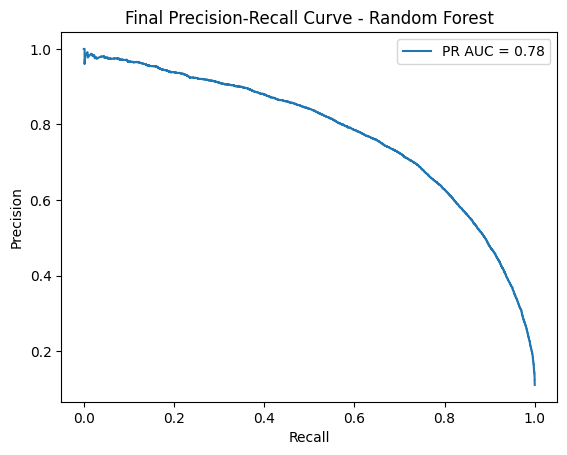


Final Training for XGBoost

Final Metrics for XGBoost: {'Accuracy': 0.9262503907471085, 'Precision': 0.6308702610231224, 'Recall': 0.8062059238363892, 'F1': 0.7078418624810378, 'ROC AUC': 0.9596702597817628, 'PR AUC': 0.7894755615395821}


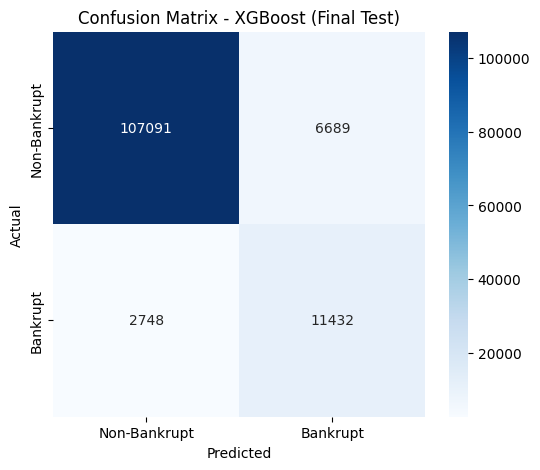

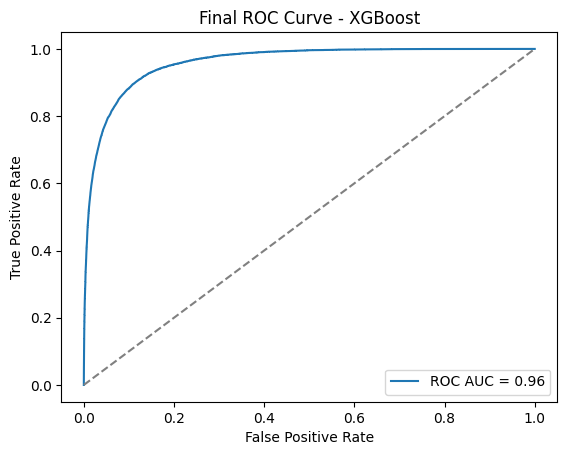

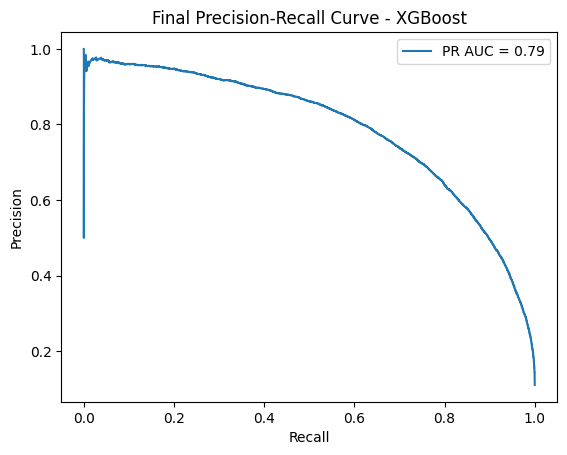

In [34]:
# Models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1, subsample=0.8),
    # "SVM (RBF Kernel)": SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
}

# Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
cv_results = {model_name: [] for model_name in models.keys()}
roc_curves_cv = {model_name: [] for model_name in models.keys()}
pr_curves_cv = {model_name: [] for model_name in models.keys()}
confusion_matrices_cv = {model_name: [] for model_name in models.keys()}  # **For storing confusion matrices**

for model_name, model in models.items():
    print(f"\nTraining {model_name} with Cross-Validation")
    thresholds = []

    for fold_idx, (train_index, val_index) in enumerate(cv.split(X_train_resampled, y_train_resampled)):
        X_fold_train, X_fold_val = X_train_resampled[train_index], X_train_resampled[val_index]
        y_fold_train, y_fold_val = y_train_resampled[train_index], y_train_resampled[val_index]

        model.fit(X_fold_train, y_fold_train)
        y_fold_proba = model.predict_proba(X_fold_val)[:, 1]

        # Find the best threshold for F1
        best_threshold = 0.5
        best_f1 = 0
        for threshold in np.arange(0.1, 1.0, 0.01):
            y_fold_pred = (y_fold_proba >= threshold).astype(int)
            f1 = f1_score(y_fold_val, y_fold_pred)
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold

        thresholds.append(best_threshold)

        # Metrics at best threshold
        y_fold_pred = (y_fold_proba >= best_threshold).astype(int)
        accuracy = accuracy_score(y_fold_val, y_fold_pred)
        precision = precision_score(y_fold_val, y_fold_pred)
        recall = recall_score(y_fold_val, y_fold_pred)
        f1 = f1_score(y_fold_val, y_fold_pred)
        roc_auc = roc_auc_score(y_fold_val, y_fold_proba)

        conf_matrix = confusion_matrix(y_fold_val, y_fold_pred)
        confusion_matrices_cv[model_name].append(conf_matrix)  # **Store confusion matrix for fold**

        pr_curve_precision, pr_curve_recall, _ = precision_recall_curve(y_fold_val, y_fold_proba)
        pr_auc = auc(pr_curve_recall, pr_curve_precision)

        cv_results[model_name].append({
            "Fold": fold_idx + 1,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1": f1,
            "ROC AUC": roc_auc,
            "PR AUC": pr_auc,
        })

        # ROC and PR curves
        fpr, tpr, _ = roc_curve(y_fold_val, y_fold_proba)
        roc_curves_cv[model_name].append((fpr, tpr))
        pr_curves_cv[model_name].append((pr_curve_precision, pr_curve_recall))

        # **Plot confusion matrix for the fold**
        plt.figure(figsize=(6, 5))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                    xticklabels=["Non-Bankrupt", "Bankrupt"],
                    yticklabels=["Non-Bankrupt", "Bankrupt"])
        plt.title(f"Confusion Matrix - {model_name} (Fold {fold_idx + 1})")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

    mean_threshold = np.mean(thresholds)
    print(f"Mean Threshold for {model_name}: {mean_threshold:.2f}")

    # Display Cross-validation Metrics
    print(f"\nCross-validation Metrics for {model_name}:")
    for fold_metrics in cv_results[model_name]:
        print(f"  Fold {fold_metrics['Fold']}: Accuracy: {fold_metrics['Accuracy']:.4f}, Precision: {fold_metrics['Precision']:.4f}, Recall: {fold_metrics['Recall']:.4f}, F1: {fold_metrics['F1']:.4f}")

    # Plot ROC and PR curves
    plt.figure()
    for fold_idx, (fpr, tpr) in enumerate(roc_curves_cv[model_name]):
        plt.plot(fpr, tpr, label=f"Fold {fold_idx + 1}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    plt.figure()
    for fold_idx, (precision, recall) in enumerate(pr_curves_cv[model_name]):
        plt.plot(recall, precision, label=f"Fold {fold_idx + 1}")
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()

# Final Training and Evaluation
final_results = {}

for model_name, model in models.items():
    print(f"\nFinal Training for {model_name}")
    model.fit(X_train_resampled, y_train_resampled)
    y_test_proba = model.predict_proba(X_test_normalized)[:, 1]

    # Use the mean threshold from CV
    mean_threshold = np.mean(thresholds)
    y_test_pred = (y_test_proba >= mean_threshold).astype(int)

    # Metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_proba)

    conf_matrix = confusion_matrix(y_test, y_test_pred)

    pr_curve_precision, pr_curve_recall, _ = precision_recall_curve(y_test, y_test_proba)
    pr_auc = auc(pr_curve_recall, pr_curve_precision)

    final_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc,
    }

    print(f"\nFinal Metrics for {model_name}: {final_results[model_name]}")

    # **Plot final confusion matrix**
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Non-Bankrupt", "Bankrupt"],
                yticklabels=["Non-Bankrupt", "Bankrupt"])
    plt.title(f"Confusion Matrix - {model_name} (Final Test)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Plot final curves
    plt.figure()
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.title(f"Final ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(pr_curve_recall, pr_curve_precision, label=f"PR AUC = {pr_auc:.2f}")
    plt.title(f"Final Precision-Recall Curve - {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()
